# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM CBB3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 


# Team Supervisor
- Chris Barnett

# TEAM CBB3 MEMBERS
- 1. Elelwani Tshikovhi (Team Leader);
- 2. Katlego Maponya;
- 3. Phindile Hlela (Team coordinator);
- 4. Fortune Mwenda ;
- 5. Thembani Maswanganyi;
- 6. Desree Maleka


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

# Import all the  **libraries** 


In [10]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import * 
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
#from xgboost import plot_importance
#pd.set_option('max_columns', None)
#from catboost import *
#import catboost
from sklearn.model_selection import GridSearchCV


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ### 

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

The training and testing data, `trains_set` and `test_set` respectively are loaded as Pandas DataFrames. 

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-Regression-Team-CBB3/Regression-public-data/main/df_train.csv", index_col=0)
test_df = pd.read_csv("https://raw.githubusercontent.com/Explore-Regression-Team-CBB3/Regression-public-data/main/df_test.csv", index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---


# 3.1 Inspecting the Dataframes
We are going to look at the data  before we do further explorotary analysis


In [228]:
#To view the first 10 data in the dataframe
df.head(10)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,191.333333,4.666667,254.666667,0.0,2.666667,0.0,sp25,0.0,0.0,1035.666667,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,NaN,282.077844,1013.333333,277.622563,277.622563,800.666667,282.077844,72.666667,277.622563,284.165625,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,210.333333,3.333333,276.000000,0.0,2.000000,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1006.000000,277.637000,974.333333,272.270333,272.270333,800.666667,277.637000,83.333333,272.270333,283.420333,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,238.666667,2.000000,310.000000,0.0,2.333333,0.0,sp25,0.0,0.0,1037.6666

This command  ` df.info` shows the datatype which will help check which data falls into the numerical and categorical data where numerical is integer,float and catagorical is object.This helps to distinguish which data visualisation applies to which data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

   *  We can see from above cell that Seville_pressure,Valencia_wind_deg,time  are object   while the rest are numerical 
   * time needs to be changed to numerical data 

In [6]:
df.shape

(8763, 48)

In [7]:
test_df.shape

(2920, 47)

Entries and shapes for the training and testing dataframes are insepcted to explore what data is dealt with and how much entries are at our disposal


This command  below will provide the total number of null values appearing in each feature .

In [8]:
test_df.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

In [8]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

We can see that *Valencia_pressure   =  2068* has large amount of null values which we will further look at in the Data Engineering stage

In [9]:
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


**Skew** command will show  how symmetrical the data is.

In [10]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [11]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

# Insight of skewness 
* If the value of the skewness is -0.5 < x < 0.5 then it is Fairly Symmetrical but if <-0.5 then it is negatively skewed  and if >0.5 then it positively skewed 
*  High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.we cam clearly see in some data we have a large number of outliers
* WAYS TO DEAL WITH SKEWENESS AND OUTLIERS 
    - Log Transformation which will transform it to normal distrubution
    - Remove outliers 
    - Normalize min-max
    - Replace the outliers with mode,mean ,median
    - cap the outliers 


# 3.2 Plotting  relevant feature interactions

In [11]:
features = ['Bilbao_rain_1h', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg'
            ,'Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id','Bilbao_temp','Bilbao_temp_max'
            ,'Madrid_wind_speed','Valencia_wind_speed','Valencia_wind_speed','Seville_humidity',
            'Madrid_humidity','Seville_clouds_all','Barcelona_wind_speed','Barcelona_wind_deg','Madrid_clouds_all'
            ,'Seville_wind_speed','Barcelona_rain_1h','Seville_rain_1h','Barcelona_pressure','Seville_rain_3h'
            ,'Madrid_rain_1h','Barcelona_rain_3h','Valencia_snow_3h','Madrid_weather_id','Barcelona_weather_id'
            ,'Seville_weather_id','Valencia_pressure','Seville_temp_max','Madrid_pressure','Valencia_temp_max'
            ,'Valencia_temp','Seville_temp','Valencia_humidity','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max'
            ,'Barcelona_temp','Seville_temp_min','Madrid_temp' , 'Madrid_temp_min'] 
# create a list of all numerical features

Plotting few features to see the outliers and how well it interact with the response variable

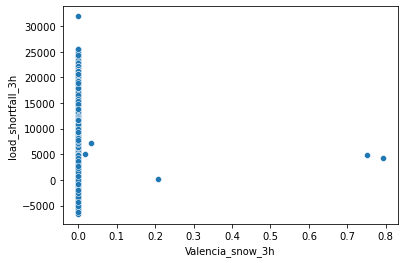

In [12]:
sns.scatterplot(x='Valencia_snow_3h',y='load_shortfall_3h', data=df);

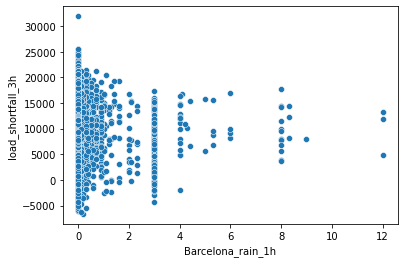

In [14]:
sns.scatterplot(x='Barcelona_rain_1h',y='load_shortfall_3h', data=df);

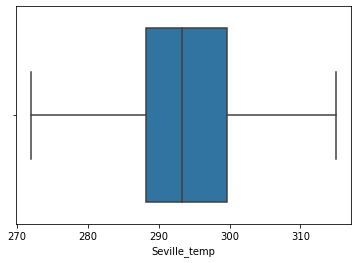

In [15]:
sns.boxplot(x='Seville_temp', data=df);

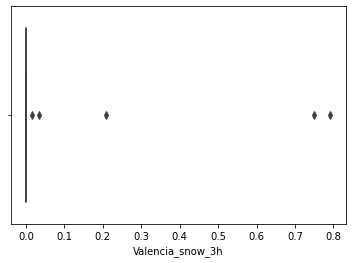

In [16]:
sns.boxplot(x='Valencia_snow_3h', data=df);   

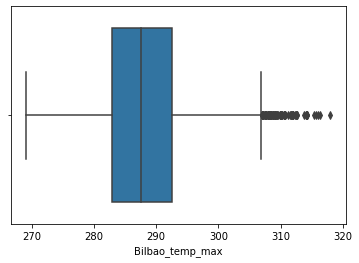

In [17]:
sns.boxplot(x='Bilbao_temp_max', data=df);

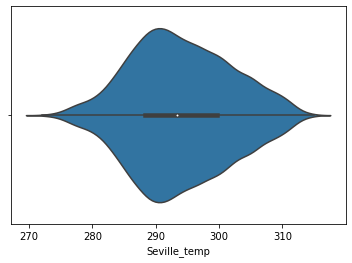

In [18]:
sns.violinplot(x='Seville_temp', data=df);

## 3.3 Visualisations of some categorical data using the bar graph 

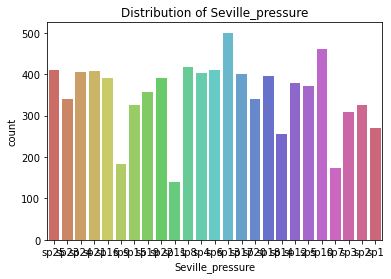

In [19]:
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")
plt.title("Distribution of Seville_pressure");

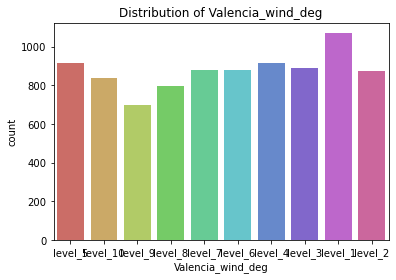

In [4]:
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")
plt.title("Distribution of Valencia_wind_deg");

## 3.4 Evaluating  Correlation of the data

In [5]:
df1 = df.copy()

In [8]:
df1.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


In [12]:
df1.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [13]:
df5 = df1[[ 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'load_shortfall_3h']]

In [14]:
df5.corr()

,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Valencia_temp_max,1.000000,0.987533,0.112775,0.896059,-0.399380,0.949377,0.918256,0.917838,0.912094,0.840573,0.854592,0.845057,0.837574,0.886449,0.911331,0.862683,0.144270
Valencia_temp,0.987533,1.000000,0.106095,0.887040,-0.413654,0.985479,0.901400,0.917820,0.914601,0.847584,0.854892,0.874447,0.833562,0.890915,0.915753,0.871563,0.173225
Bilbao_weather_id,0.112775,0.106095,1.000000,0.190360,0.114838,0.095554,0.146071,0.153665,0.128188,0.140580,0.190635,0.098428,0.235183,0.145173,0.143126,0.124199,0.145875
Seville_temp,0.896059,0.887040,0.190360,1.000000,-0.281993,0.852492,0.866389,0.920908,0.852651,0.818454,0.839014,0.779252,0.828099,0.955160,0.917075,0.868453,0.159343
Valencia_humidity,-0.399380,-0.413654,0.114838,-0.281993,1.000000,-0.413537,-0.221430,-0.262919,-0.247168,-0.271621,-0.260946,-0.266820,-0.241397,-0.301694,-0.261356,-0.247574,0.043140
Valencia_temp_min,0.949377,0.985479,0.095554,0.852492,-0.413537,1.000000,0.860510,0.893368,0.892024,0.832773,0.832393,0.879687,0.806606,0.871738,0.897012,0.860347,0.201863
Barcelona_temp_max,0.918256,0.901400,0.146071,0.866389,-0.221430,0.860510,1.000000,0.906248,0.974480,0.854620,0.867268,0.885911,0.844563,0.862597,0.896766,0.847888,0.164734
Madrid_temp_max,0.917838,0.917820,0.153665,0.920908,-0.262919,0.893368,0.906248,1.000000,0.900428,0.865596,0.872234,0.836680,0.846887,0.923481,0.988871,0.939147,0.182548
Barcelona_temp,0.912094,0.914601,0.128188,0.852651,-0.247168,0.892024,0.974480,0.900428,1.000000,0.867434,0.865705,0.964089,0.831470,0.873170,0.903143,0.868222,0.182673
Bilbao_temp_min,0.840573,0.847584,0.140580,0.818454,-0.271621,0.832773,0.854620,0.865596,0.867434,1.000000,0.982936,0.831224,0.932219,0.847007,0.876185,0.845799,0.172920


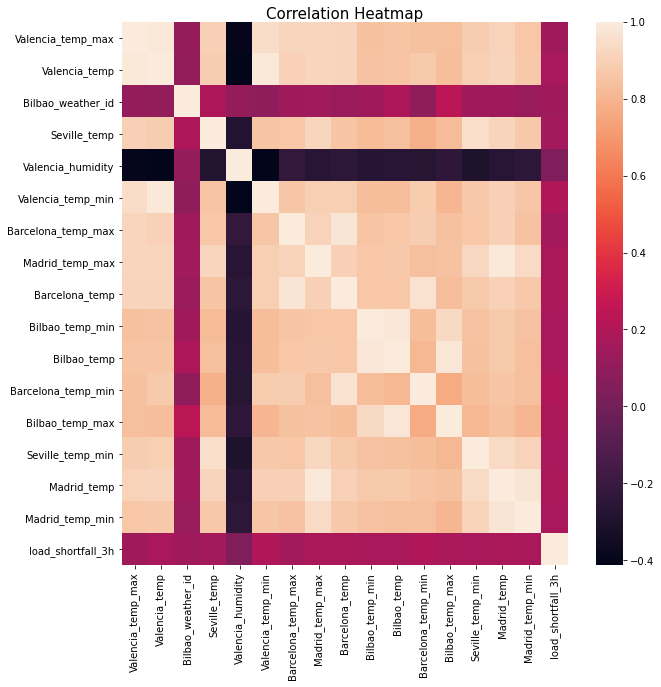

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
heatmap = sns.heatmap(df5.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=1);

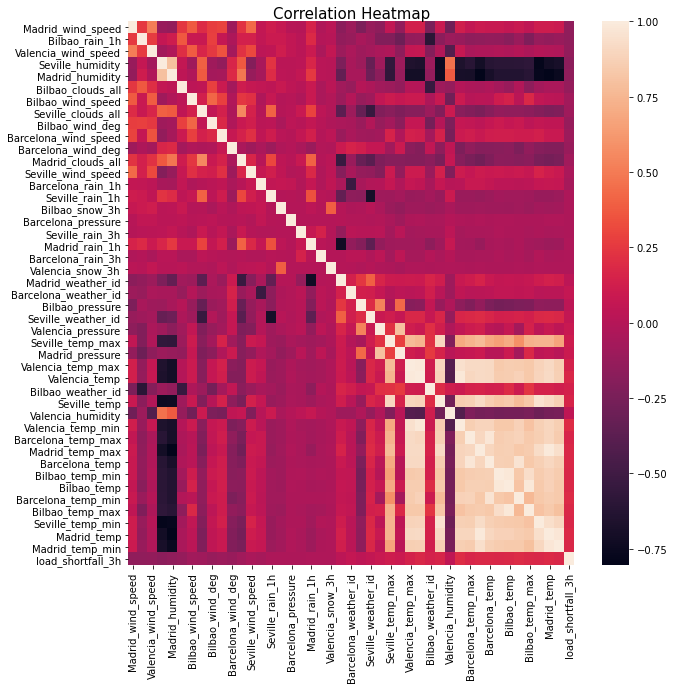

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
heatmap = sns.heatmap(df1.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=1);

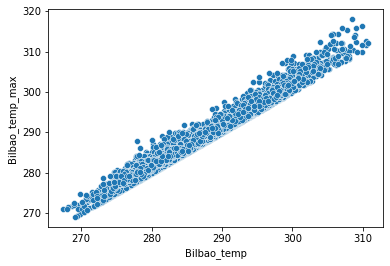

In [24]:
sns.scatterplot(x='Bilbao_temp',y='Bilbao_temp_max', data=df1);

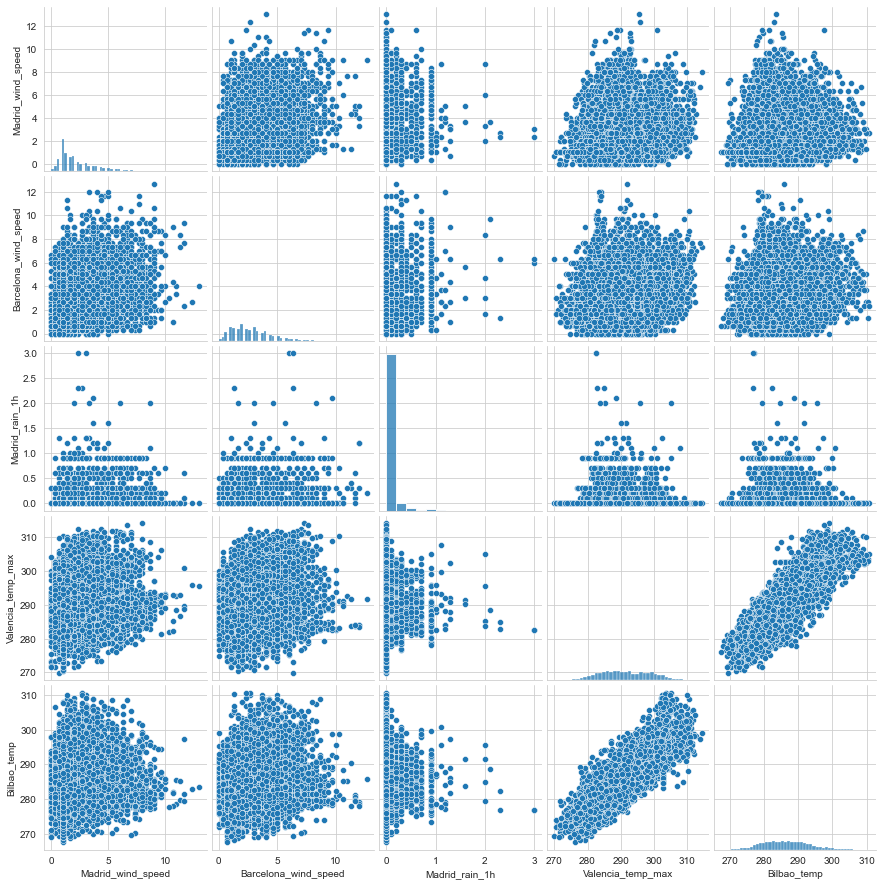

In [25]:
sns.set_style("whitegrid");
sns.pairplot(df1.iloc[:, 1::10]);
plt.show()

# Insight of correlation 
 correlation heat map of the features above which 
* shows the relationship between the features  those with 0 have no relationship but anything >< 0 has some sort of relationship with target and other features


# 3.6 Looking at feature distributions

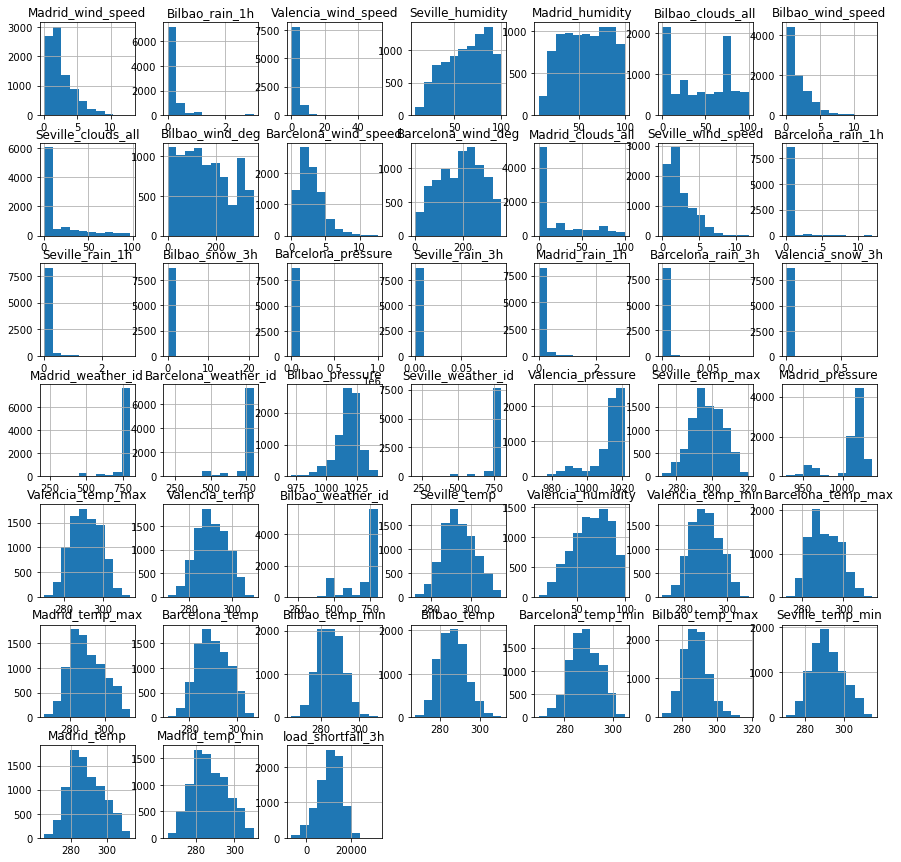

In [8]:
df.hist(figsize=(15,15));

In [ ]:
df[features].plot(kind='density', subplots=True, layout=(12,4), sharex=False, figsize=(20, 15));

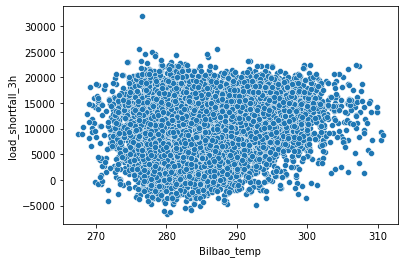

In [6]:
sns.scatterplot(x='Bilbao_temp',y='load_shortfall_3h', data=df);

In [ ]:
sns.scatterplot(x='Bilbao_temp',y='Bilbao_temp_max', data=df);

In [ ]:
fig = plt.figure(figsize=(9, 7))
sns.histplot(df["Bilbao_temp"], stat="density", kde=True)

In [ ]:
fig = plt.figure(figsize=(9, 7))
sns.histplot(df["load_shortfall_3h"], stat="density", kde=True)

In [ ]:
sns.jointplot(x = 'Bilbao_temp', y = 'Bilbao_temp_max', data = df);

In [ ]:
sns.jointplot(x = 'Seville_temp', y = 'Bilbao_temp_max', data = df)

 # **Please be aware the below cells take several minutes to completely run**

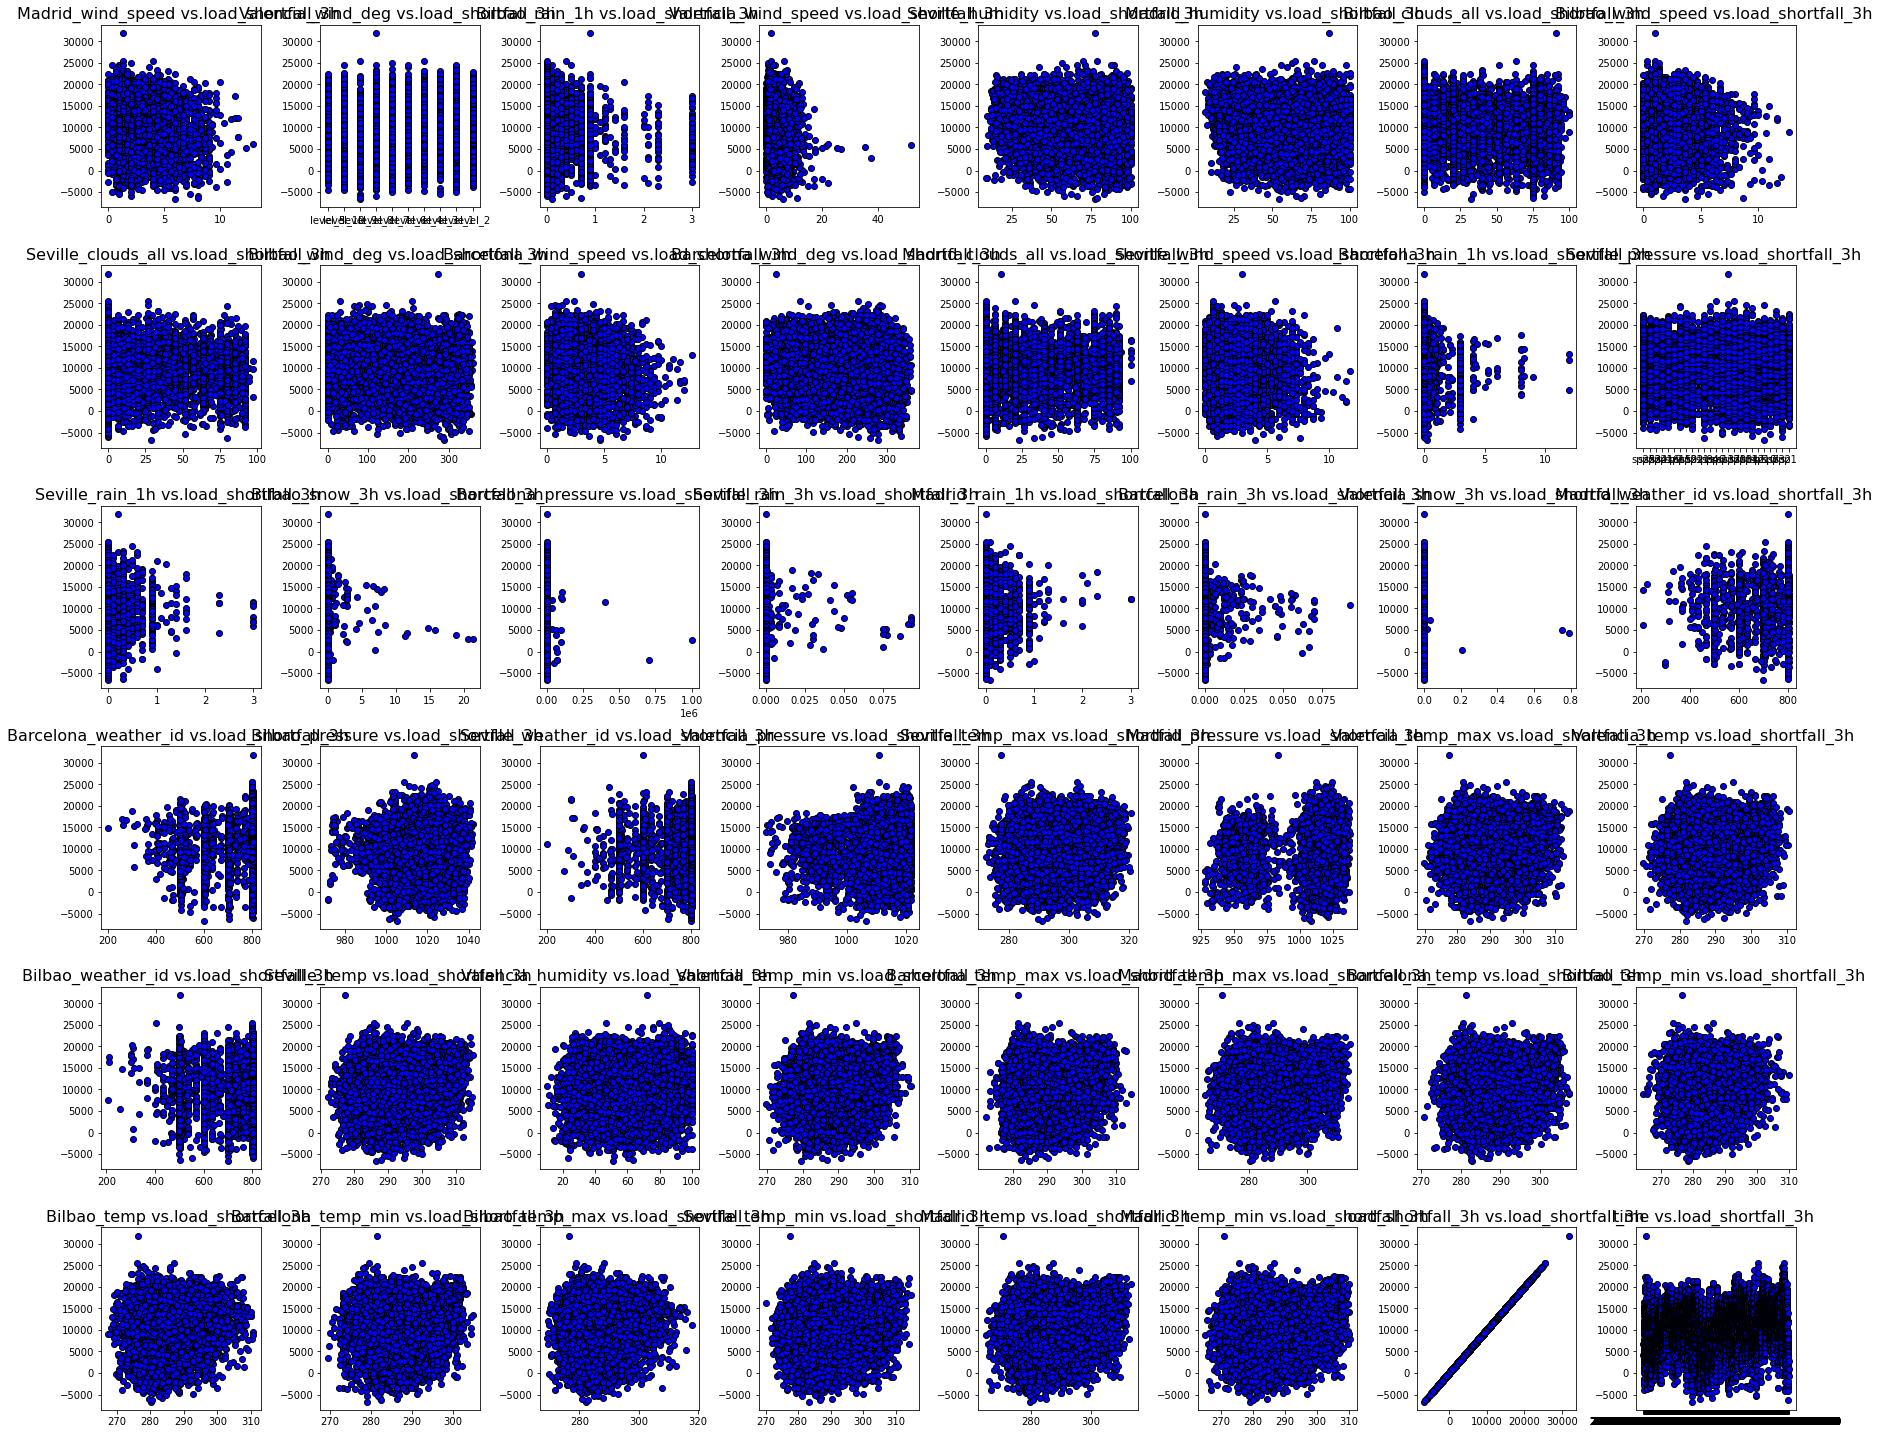

In [7]:
fig, axs = plt.subplots(6,8, figsize=(25,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs.load_shortfall_3h ".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [ ]:
# we wanted to show the multicollinearity of the data but takes too long to run
#from seaborn import pairplot
#g = pairplot(df1.drop(df.iloc[:, 8::48], axis='columns'))
#g.fig.set_size_inches(9,9)

# Insight on the feature distribution
   * some of the features are fairly distrubuted and some features show linearity with  the Target  
    - SOME features need to be standardised  or 
    - normalised

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

# 4.1 Missing values

Check the percentage of the missing values in our dataframe

In [108]:
df1 = df.copy()

In [109]:
((df1.isnull() | df1.isna()).sum() * 100 / df1.index.size).round(2)

time                     0.0
Madrid_wind_speed        0.0
Valencia_wind_deg        0.0
Bilbao_rain_1h           0.0
Valencia_wind_speed      0.0
Seville_humidity         0.0
Madrid_humidity          0.0
Bilbao_clouds_all        0.0
Bilbao_wind_speed        0.0
Seville_clouds_all       0.0
Bilbao_wind_deg          0.0
Barcelona_wind_speed     0.0
Barcelona_wind_deg       0.0
Madrid_clouds_all        0.0
Seville_wind_speed       0.0
Barcelona_rain_1h        0.0
Seville_pressure         0.0
Seville_rain_1h          0.0
Bilbao_snow_3h           0.0
Barcelona_pressure       0.0
Seville_rain_3h          0.0
Madrid_rain_1h           0.0
Barcelona_rain_3h        0.0
Valencia_snow_3h         0.0
Madrid_weather_id        0.0
Barcelona_weather_id     0.0
Bilbao_pressure          0.0
Seville_weather_id       0.0
Valencia_pressure       23.6
Seville_temp_max         0.0
Madrid_pressure          0.0
Valencia_temp_max        0.0
Valencia_temp            0.0
Bilbao_weather_id        0.0
Seville_temp  

### Dealing with  missing

Since **'Valencia_pressure'** has 23.6% missing values.
we fill the missing values with mode

In [110]:

df1.isnull().sum().sum()

2068

In [111]:
df1['Valencia_pressure'].fillna(df1['Valencia_pressure'].mode()[0], inplace = True)


In [112]:

df1.isnull().sum().sum()

0

# 4.2 Numerical Features

In thisdataset we need to visualize the different types of variables like time, discrete and continuous numerical feature, categorical feature.

    -Check how many features are numerical

In [113]:
numerical_features = [features for features in df1.columns if df1[features].dtypes != 'O' ]
print('In the dataset, the number of numerical features are: ', len(numerical_features))

In the dataset, the number of numerical features are:  45


# 4.3 Categorical Features
-Check how many features are categorical

In [114]:
categorical_features = [features for features in df1.columns if df1[features].dtypes == 'O' ]
print('In the dataset, the number of categorical features are: ', len(categorical_features))

In the dataset, the number of categorical features are:  3


# 4.4 Creating 'time Features

# Datetime Features
-Check how many features are of type datetime

In [115]:
datetime_features = [features for features in df1.columns if df1[features].dtypes == 'datetime64' ]
print('In the dataset, the number of datetime features are: ', len(datetime_features))

In the dataset, the number of datetime features are:  0


# Convert argument to datetime

convert **'time'** feature from object to datetime

In [116]:
df1.time=pd.to_datetime(df1.time, infer_datetime_format=True)

# Creating new  time features

**Fast-ML is a Python package with numerous inbuilt functionalities to make the life of a data scientist much easier**

-Create new features using **FeatureEngineering_DateTime**

In [13]:
pip install fast_ml

Note: you may need to restart the kernel to use updated packages.


In [117]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime

In [118]:
df_fe = FeatureEngineering_DateTime()
df_fe.fit(df1, datetime_variables=['time'])
df1 = df_fe.transform(df1)
df1.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_month_start,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:minute,time:second,time:is_weekend,time:day_part
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,03:00:00,3,0,0,0,midnight
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,3,1,1,False,True,False,True,False,True,06:00:00,6,0,0,0,early morning


Let us have a look at the correlation(s) between our newly created temporal features

<AxesSubplot:>

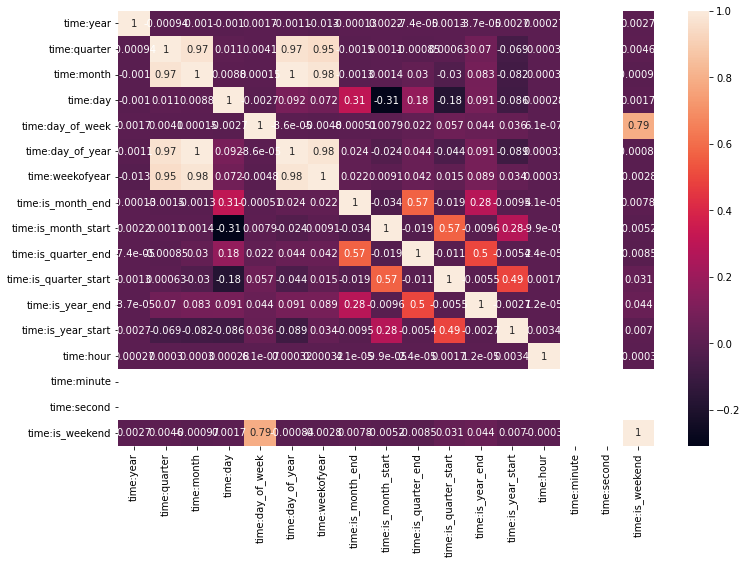

In [119]:
Time_df = df1.iloc[:,[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[12,8])
sns.heatmap(Time_df.corr(),annot=True )

Looking at our heatmap tells us that we have high Multicollinearity present in our new features. The features involved are -

-time:quarter


-time:month


-time:day_of_year


-time:weekofyear

In [120]:
nunique_df=df1.nunique().reset_index()
remove_col=nunique_df[(nunique_df[0]==len(df1)) | (nunique_df[0]==0) | (nunique_df[0]==1) ]['index'].tolist()
remove_col

['time', 'time:minute', 'time:second']

In [121]:
df1=df1.drop(remove_col,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      8763 non-null   float64
 1   Valencia_wind_deg      8763 non-null   object 
 2   Bilbao_rain_1h         8763 non-null   float64
 3   Valencia_wind_speed    8763 non-null   float64
 4   Seville_humidity       8763 non-null   float64
 5   Madrid_humidity        8763 non-null   float64
 6   Bilbao_clouds_all      8763 non-null   float64
 7   Bilbao_wind_speed      8763 non-null   float64
 8   Seville_clouds_all     8763 non-null   float64
 9   Bilbao_wind_deg        8763 non-null   float64
 10  Barcelona_wind_speed   8763 non-null   float64
 11  Barcelona_wind_deg     8763 non-null   float64
 12  Madrid_clouds_all      8763 non-null   float64
 13  Seville_wind_speed     8763 non-null   float64
 14  Barcelona_rain_1h      8763 non-null   float64
 15  Sevi

# Used for expanding the number fo visible columns of dataframe

In [21]:
pd.options.display.max_columns = None
df1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time:year,time:day,time:day_of_week,time:is_month_end,time:is_month_start,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:is_weekend,time:day_part
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,False,True,False,True,False,True,03:00:00,3,0,midnight
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,False,True,False,True,False,True,06:00:00,6,0,early morning
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,3,False,True,False,True,False,True,09:00:00,9,0,late morning
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,3,False,True,False,True,False,True,12:00:00,12,0,noon
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,3,False,True,False,True,False,True,15:00:00,15,0,afternoon


Replace 0's and 1's with True and False in the **'time:is_weekend'** feature

In [122]:
df1['time:is_weekend']=df1['time:is_weekend'].replace({0:False,1:True})

In [123]:
df1['time:day_part'] = df1['time:day_part'].fillna(value=np.nan)

replace null with midnight

In [124]:
df1['time:day_part'] = df1['time:day_part'].fillna(value='midnight')

In [125]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df1['time:day_part'] = enc.fit_transform(df1[['time:day_part']])

Drop/remove featues which are not useful in the dataset

In [126]:
df1=df1.drop(['time:time','time:is_year_start','time:is_quarter_start','time:is_month_start','time:day_part'],axis=1)

Rename the columns e.g: **time:year** to **year**

In [127]:
import re
df1 = df1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,timeyear,timequarter,timemonth,timeday,timeday_of_week,timeday_of_year,timeweekofyear,timeis_month_end,timeis_quarter_end,timeis_year_end,timehour,timeis_weekend
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,1,3,1,1,False,False,False,3,False
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,1,3,1,1,False,False,False,6,False
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,1,3,1,1,False,False,False,9,False
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,1,3,1,1,False,False,False,12,False
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,1,3,1,1,False,False,False,15,False


# Check the number of rows and columns/the shape

In [128]:
df1.shape

(8763, 59)

# 4.5  Engineering Existing Features

Check the count of Valencia_wind_deg

In [9]:
#Impute Categirical features using OrdinalEncoder()
df1.Valencia_wind_deg = enc.fit_transform(df1[['Valencia_wind_deg']])
df1.Seville_pressure = enc.fit_transform(df1[['Seville_pressure']])

NameError: name 'enc' is not defined

In [31]:
df1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,timeyear,timeday,timeday_of_week,timeis_month_end,timeis_quarter_end,timeis_year_end,timehour,timeis_weekend
0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,17.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,False,False,False,3,False
1,0.333333,1.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,17.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,False,False,False,6,False
2,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,17.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,3,False,False,False,9,False
3,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,17.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,3,False,False,False,12,False
4,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,17.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,3,False,False,False,15,False


insure that load_shortfall_3h is the last column in the data frame

In [131]:
new_cols = [col for col in df1.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h']
df1 = df1[new_cols]

In [132]:
df1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,timeyear,timequarter,timemonth,timeday,timeday_of_week,timeday_of_year,timeweekofyear,timeis_month_end,timeis_quarter_end,timeis_year_end,timehour,timeis_weekend,load_shortfall_3h
0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,17.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,1,3,1,1,False,False,False,3,False,6715.666667
1,0.333333,1.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,17.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,1,3,1,1,False,False,False,6,False,4171.666667
2,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,17.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,1,3,1,1,False,False,False,9,False,4274.666667
3,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,17.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,1,3,1,1,False,False,False,12,False,5075.666667
4,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,17.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,1,3,1,1,False,False,False,15,False,6620.666667


# 4.6  Repeating the Data Engineering for the test data  to insure we have same Columns
test_df : Data Engineering 


**Do the same Data Engineering for the test dataframe**

 load the data from the df_test file into a DataFrame

# Missing values percentage

In [268]:
test_df = pd.read_csv("https://raw.githubusercontent.com/Explore-Regression-Team-CBB3/Regression-public-data/main/df_test.csv", index_col=0)

In [269]:
((test_df.isnull() | test_df.isna()).sum() * 100 / test_df.index.size).round(2)

time                     0.00
Madrid_wind_speed        0.00
Valencia_wind_deg        0.00
Bilbao_rain_1h           0.00
Valencia_wind_speed      0.00
Seville_humidity         0.00
Madrid_humidity          0.00
Bilbao_clouds_all        0.00
Bilbao_wind_speed        0.00
Seville_clouds_all       0.00
Bilbao_wind_deg          0.00
Barcelona_wind_speed     0.00
Barcelona_wind_deg       0.00
Madrid_clouds_all        0.00
Seville_wind_speed       0.00
Barcelona_rain_1h        0.00
Seville_pressure         0.00
Seville_rain_1h          0.00
Bilbao_snow_3h           0.00
Barcelona_pressure       0.00
Seville_rain_3h          0.00
Madrid_rain_1h           0.00
Barcelona_rain_3h        0.00
Valencia_snow_3h         0.00
Madrid_weather_id        0.00
Barcelona_weather_id     0.00
Bilbao_pressure          0.00
Seville_weather_id       0.00
Valencia_pressure       15.55
Seville_temp_max         0.00
Madrid_pressure          0.00
Valencia_temp_max        0.00
Valencia_temp            0.00
Bilbao_wea

# Filling the missing the values with the mode 

In [270]:
test_df1 = test_df.copy()

In [271]:

test_df1['Valencia_pressure'].fillna(test_df1['Valencia_pressure'].mode()[0], inplace = True)
test_df1.isnull().sum().sum()

0

# Convert argument to datetime

In [272]:
test_df1 = test_df1.copy()
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2920 non-null   object 
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   object 
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h

In [273]:
# convert to datetime
test_df1.time=pd.to_datetime(test_df1.time, infer_datetime_format=True)

# Create new features
Create new features using FeatureEngineering_DateTime

In [274]:
dt_fe = FeatureEngineering_DateTime()
dt_fe.fit(test_df1, datetime_variables=['time'])
test_df1 = dt_fe.transform(test_df1)
test_df1.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_month_start,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:minute,time:second,time:is_weekend,time:day_part
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1016.0,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,00:00:00,0,0,0,0,None
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1016.0,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,03:00:00,3,0,0,0,midnight
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1016.0,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,06:00:00,6,0,0,0,early morning
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1016.0,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,1,False,True,False,True,False,True,09:00:00,9,0,0,0,late morning
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1016.0,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,1,False,True,False,True,False,True,12:00:00,12,0,0,0,noon


<AxesSubplot:>

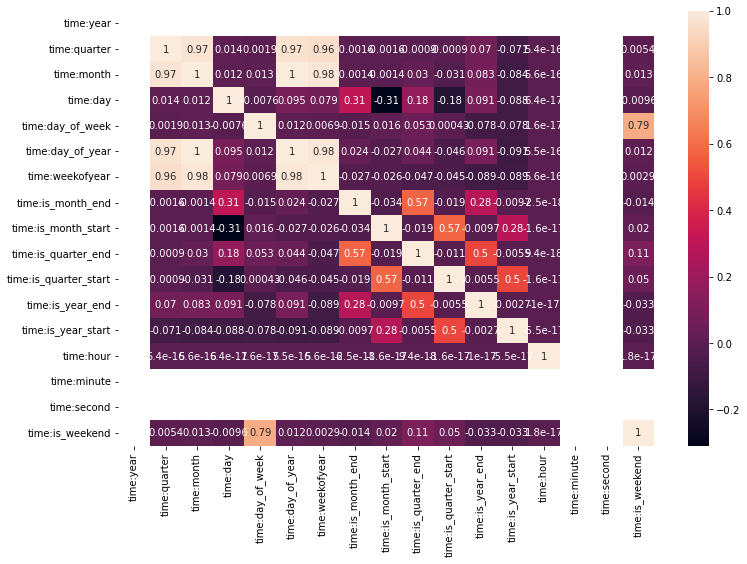

In [275]:
Time_df = test_df1.iloc[:,[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[12,8])
sns.heatmap(Time_df.corr(),annot=True )

In [276]:
test_df1=test_df1.drop(remove_col,axis=1)

In [277]:
test_df1['time:is_weekend'] = test_df1['time:is_weekend'].replace({0:False,1:True})

In [278]:
test_df1['time:day_part'] = test_df1['time:day_part'].fillna(value=np.nan)

In [279]:
test_df1['time:day_part'] = test_df1['time:day_part'].fillna(value='midnight')
test_df1['time:day_part'] = enc.fit_transform(test_df1[['time:day_part']])

In [280]:
test_df1 = test_df1.drop(['time:time','time:is_year_start','time:is_quarter_start','time:is_month_start','time:day_part'],axis=1)

# Used for expanding the number fo visible columns of dataframe

In [281]:
test_df1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time:year,time:quarter,time:month,time:day,time:day_of_week,time:day_of_year,time:weekofyear,time:is_month_end,time:is_quarter_end,time:is_year_end,time:hour,time:is_weekend
8763,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1016.0,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,1,False,False,False,0,False
8764,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1016.0,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,1,False,False,False,3,False
8765,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1016.0,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,1,False,False,False,6,False
8766,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1016.0,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,1,False,False,False,9,False
8767,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1016.0,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,1,False,False,False,12,False


# Check the number of rows and columns/the shape

In [282]:
test_df1.shape

(2920, 58)

In [283]:
test_df1 = test_df1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_df1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,timeyear,timequarter,timemonth,timeday,timeday_of_week,timeday_of_year,timeweekofyear,timeis_month_end,timeis_quarter_end,timeis_year_end,timehour,timeis_weekend
8763,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1016.0,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,1,0,1,1,False,False,False,0,False
8764,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1016.0,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,1,0,1,1,False,False,False,3,False
8765,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1016.0,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,1,0,1,1,False,False,False,6,False
8766,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1016.0,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,1,0,1,1,False,False,False,9,False
8767,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1016.0,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,1,0,1,1,False,False,False,12,False


# Engineer existing features

# Convert Valencia_wind_deg into a numeric feature

In [284]:
test_df1.Valencia_wind_deg = enc.fit_transform(test_df1[['Valencia_wind_deg']])
test_df1.Seville_pressure = enc.fit_transform(test_df1[['Seville_pressure']])


# Scaling both Test and Train data

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features_test = scaler.fit_transform(test_df1.values)
columns = df1.drop(['load_shortfall_3h'] , axis=1).columns
df_train_scaled = pd.DataFrame(scaled_features, index=df1.index, columns=columns)
df_test_scaled = pd.DataFrame(scaled_features_test, index=test_df1.index , columns=columns)

In [152]:
#Add load_short_fall_3h as last_columns on training data
df_train_scaled['load_shortfall_3h'] = df.load_shortfall_3h.values

In [192]:
df2 = df1.copy()
df_test_scaled.shape

(2920, 58)

# 4.7  Outliers

In [154]:
outlier_columns = ['Bilbao_rain_1h','Barcelona_rain_1h','Seville_rain_1h','Bilbao_snow_3h',
                  'Barcelona_pressure','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h',
                  'Valencia_snow_3h','Madrid_weather_id','Barcelona_weather_id','Seville_weather_id']

for column in outlier_columns:
    
    mean = df2[column].mean()
    std_dev = df2[column].std()
    
    min_border = mean - std_dev * 3
    max_border = mean + std_dev * 3
    
    outliers = df2[(df2[column] < min_border) | (df2[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    df2.drop(outliers, inplace = True)

150 outliers detected in column Bilbao_rain_1h
193 outliers detected in column Barcelona_rain_1h
174 outliers detected in column Seville_rain_1h
29 outliers detected in column Bilbao_snow_3h
8 outliers detected in column Barcelona_pressure
42 outliers detected in column Seville_rain_3h
156 outliers detected in column Madrid_rain_1h
93 outliers detected in column Barcelona_rain_3h
0 outliers detected in column Valencia_snow_3h
229 outliers detected in column Madrid_weather_id
326 outliers detected in column Barcelona_weather_id
248 outliers detected in column Seville_weather_id


In [146]:
df2.shape

(7115, 54)

# There is too many outliers to remove them all

Reasons for having such outliers
- unseasonal weather
- global warming
- severe and unexpected storms 


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the three hour load shortfall. |

---

In [164]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.preprocessing import StandardScaler

## 5.1 Model 1: Linear Regression Basic

In [155]:
# Preprocessing

y = df['load_shortfall_3h']
X = df.drop(['load_shortfall_3h','time','Seville_pressure', 'Valencia_wind_deg',"Valencia_pressure"],axis=1)

In [156]:
lm = LinearRegression()

In [157]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [158]:
lm.fit(X_train, y_train)

LinearRegression()

In [159]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

#  Evaluting Trained model

In [160]:
inter_lm = float(lm.intercept_)

In [161]:
beta_0 = float(lm.intercept_)
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [162]:
print("Intercept:\t", beta_0)
print("\n", beta_js)

Intercept:	 -36428.37807081702

                        Coefficient
Madrid_wind_speed      -277.620752
Bilbao_rain_1h         -390.791056
Valencia_wind_speed     -67.366210
Seville_humidity        -37.382811
Madrid_humidity          -0.195529
Bilbao_clouds_all        -5.622193
Bilbao_wind_speed       -76.527638
Seville_clouds_all        0.904885
Bilbao_wind_deg          -2.093517
Barcelona_wind_speed   -105.396391
Barcelona_wind_deg       -3.401983
Madrid_clouds_all         8.311927
Seville_wind_speed      -16.697979
Barcelona_rain_1h      -144.081701
Seville_rain_1h         814.861979
Bilbao_snow_3h          157.974608
Barcelona_pressure       -0.004943
Seville_rain_3h      -50671.484619
Madrid_rain_1h          221.824925
Barcelona_rain_3h    -25617.717151
Valencia_snow_3h      -6081.429496
Madrid_weather_id        -0.533893
Barcelona_weather_id      1.259106
Bilbao_pressure          -3.622000
Seville_weather_id        1.061987
Seville_temp_max       -115.236322
Madrid_pressure       

In [163]:
slr = LinearRegression()

slr.fit(X_train[['Valencia_temp_max']], y_train)

LinearRegression()

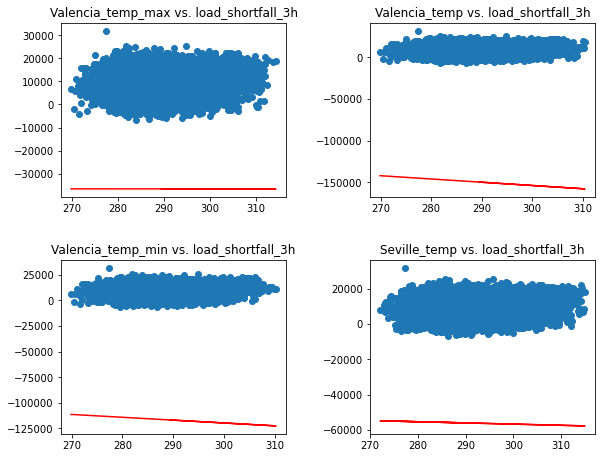

In [164]:
# evaluate one or more ML models
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['Valencia_temp_max'], df['load_shortfall_3h'])
axs[0,0].plot(df['Valencia_temp_max'], lm.intercept_ + lm.coef_[4]*df['Valencia_temp_max'], color='red')
axs[0,0].title.set_text('Valencia_temp_max vs. load_shortfall_3h')

axs[0,1].scatter(df['Valencia_temp'], df['load_shortfall_3h'])
axs[0,1].plot(df['Valencia_temp'], lm.intercept_ + lm.coef_[1]*df['Valencia_temp'], color='red')
axs[0,1].title.set_text('Valencia_temp vs. load_shortfall_3h')

axs[1,0].scatter(df['Valencia_temp_min'], df['load_shortfall_3h'])
axs[1,0].plot(df['Valencia_temp_min'], lm.intercept_ + lm.coef_[0]*df['Valencia_temp_min'], color='red')
axs[1,0].title.set_text('Valencia_temp_min vs. load_shortfall_3h')

axs[1,1].scatter(df['Seville_temp'], df['load_shortfall_3h'])
axs[1,1].plot(df['Seville_temp'], lm.intercept_ + lm.coef_[2]*df['Seville_temp'], color='red')
axs[1,1].title.set_text('Seville_temp vs. load_shortfall_3h')

fig.tight_layout(pad=3.0)

plt.show()

In [166]:
from sklearn import metrics
import math

In [167]:
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [168]:
results_df = pd.DataFrame(data=results_dict)

In [174]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,2.643993e+07,2.753221e+07,5247.114772
MLR,2.298282e+07,2.405728e+07,4904.822209


# this is one  example of how we did the the submission file for Kaggle submission 

In [175]:
test_df1 = test_df.drop(['time','Seville_pressure', 'Valencia_wind_deg',"Valencia_pressure"],axis=1)

In [176]:
y_predictions = lm.predict(test_df1)

In [177]:
results = {"time":test_df['time'], "load_shortfall_3h":y_predictions}
sub = pd.DataFrame(results)

In [178]:
sub.to_csv("submission1.csv", index = False ,header=True)

# 5.2 xgboost Model

In [179]:
%pip install xgboost

In [180]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
y = df1['load_shortfall_3h']
X = df1.drop(['load_shortfall_3h'],axis=1)

In [183]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.0001,
                                                    random_state=42)

In [184]:
xgbr = xgb.XGBRegressor(Learning_rate=0.001, gamma=0.01, max_depth=8, n_estimators=500)

In [185]:
xgbr.fit(X_train, y_train)

[10:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Learning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(Learning_rate=0.001, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.01, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [186]:
results_dict2 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, xgbr.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, xgbr.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, xgbr.predict(X_test)))
                    }
                }

In [187]:
results_df2 = pd.DataFrame(data=results_dict2)
results_df2

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.63849
MLR,3.332513e+00,5.138057e+06,2266.72819


In [193]:
y_prediction = xgbr.predict(df_test_scaled)
y_prediction

array([3254.5461, 3209.202 , 5266.7163, ..., 4278.573 , 4343.341 ,
       4254.774 ], dtype=float32)

In [194]:
final_df = pd.DataFrame(y_prediction,columns=['load_shortfall_3h'])
test=pd.read_csv('https://raw.githubusercontent.com/Explore-Regression-Team-CBB3/Regression-public-data/main/df_test.csv')

In [196]:
test['load_shortfall_3h']=final_df['load_shortfall_3h']
test=test[['time','load_shortfall_3h']]
test.reset_index(drop=True)
test.tail()

,time,load_shortfall_3h
2915,2018-12-31 09:00:00,4662.638184
2916,2018-12-31 12:00:00,4822.023926
2917,2018-12-31 15:00:00,4278.573242
2918,2018-12-31 18:00:00,4343.340820
2919,2018-12-31 21:00:00,4254.773926


In [197]:
test.to_csv("submission37.csv", index=False, header=True)

# 5.3 Decision Tree Model

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3)

In [200]:
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [201]:
results_dict3 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, regr_tree.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, regr_tree.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, regr_tree.predict(X_test)))
                    }
                }

In [202]:
results_df3 = pd.DataFrame(data=results_dict3)

In [203]:
results_df3

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.638490
MLR,2.043365e+07,9.461770e+06,3075.998945


In [206]:
y_prediction1 = regr_tree.predict(df_test_scaled)

In [207]:
final_df = pd.DataFrame(y_prediction1,columns=['load_shortfall_3h'])
test=pd.read_csv('https://raw.githubusercontent.com/Explore-Regression-Team-CBB3/Regression-public-data/main/df_test.csv')

In [208]:
test['load_shortfall_3h']=final_df['load_shortfall_3h']
test=test[['time','load_shortfall_3h']]
test.reset_index(drop=True)
test.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8374.667722
1,2018-01-01 03:00:00,8374.667722
2,2018-01-01 06:00:00,8374.667722
3,2018-01-01 09:00:00,8374.667722
4,2018-01-01 12:00:00,8374.667722


In [209]:
test.to_csv("submission39.csv", index=False, header=True)

# extratree regressor

In [216]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import ExtraTreesRegressor

In [217]:
reg = ExtraTreesRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)

nan

In [218]:
results_dict3_2 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, reg.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, reg.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test)))
                    }
                }

In [222]:
results_df3_2 = pd.DataFrame(data=results_dict3_2)
results_df3_2

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.638490
MLR,2.225888e-22,3.680386e+06,1918.433333


In [225]:
y_prediction = reg.predict(df_test_scaled)
y_prediction

array([8314.57      , 8257.84333333, 8295.73      , ..., 7696.56833333,
       7452.385     , 7160.10833333])

In [226]:
final_df = pd.DataFrame(y_prediction,columns=['load_shortfall_3h'])

In [227]:
test['load_shortfall_3h']=final_df['load_shortfall_3h']
test=test_df[['time','load_shortfall_3h']]
test.reset_index(drop=True)
test.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8314.570000
1,2018-01-01 03:00:00,8257.843333
2,2018-01-01 06:00:00,8295.730000
3,2018-01-01 09:00:00,8239.010000
4,2018-01-01 12:00:00,7255.886667


In [228]:
test.to_csv("submission17.csv", index=False, header=True)

# 5.4 Random Forest Regressor

In [229]:
#Preprocesing 
y = df1['load_shortfall_3h']
X = df1.drop(['load_shortfall_3h'],axis=1)


In [230]:
rf = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='auto', n_estimators=100)

In [231]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.0001,
                                                    random_state=42)

In [232]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [233]:
from sklearn import metrics
import math

In [234]:
results_dict4 = {'Training MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_train, rf.predict(X_train))
                    },
                'Test MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_test, rf.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test)))
                    }
                }

In [235]:
results_df4 = pd.DataFrame(data=results_dict4)

In [236]:
results_df4

,Training MSE,Test MSE,Test RMSE
MLR,895598.405013,1.181758e+07,3437.67


# 5.5 XGBOOST MODEL

In [237]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [238]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [239]:
xgbr = xgb.XGBRegressor(Learning_rate=0.001, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.01, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [240]:
xgbr.fit(X_train, y_train)

[11:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Learning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(Learning_rate=0.001, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.01, gpu_id=-1,
             grow_policy='depthwise', importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, ...)

In [241]:
results_dict5 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, xgbr.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, xgbr.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, xgbr.predict(X_test)))
                    }
                }

In [242]:
results_df5 = pd.DataFrame(data=results_dict5)
results_df5

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.638490
MLR,9.050525e+03,4.284975e+06,2070.018229


In [245]:
prediction = xgbr.predict(df_test_scaled)
prediction

array([7068.29  , 6512.6733, 6434.5684, ..., 5583.946 , 5223.65  ,
       2741.9534], dtype=float32)

In [246]:
data = pd.DataFrame(prediction,columns=['load_shortfall_3h'])

In [248]:
test['load_shortfall_3h']=data['load_shortfall_3h']
test=test_df[['time','load_shortfall_3h']]
test.reset_index(drop=True)
test.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7068.290039
1,2018-01-01 03:00:00,6512.673340
2,2018-01-01 06:00:00,6434.568359
3,2018-01-01 09:00:00,4334.035156
4,2018-01-01 12:00:00,1879.767090


In [249]:
test.to_csv("submission40.csv", index=False, header=True)

# 5.6 RANSAC Model

In [250]:
from sklearn.linear_model import RANSACRegressor
>>> from sklearn.datasets import make_regression

>>> reg_ = RANSACRegressor(random_state=0).fit(X_train, y_train)
>>> reg_.score(X_test, y_test)

nan

In [251]:
results_dict6 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, reg_.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, reg_.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, reg_.predict(X_test)))
                    }
                }

In [252]:
results_df6 = pd.DataFrame(data=results_dict6)
results_df6

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.638490
MLR,2.407751e+12,1.763422e+07,4199.311469


# 5.7 Lasso Model

In [253]:
from sklearn.datasets import fetch_california_housing

X_data, y_data = fetch_california_housing(return_X_y=True)

In [254]:
print('shape of X :', X_data.shape, 'shape of Y :', y_data.shape)
print('shape of X-train :', X_train.shape, 'shape of Y-train :', y_train.shape)
print('shape of X-test :', X_test.shape, 'shape of Y-test :', y_test.shape)

shape of X : (20640, 8) shape of Y : (20640,)
shape of X-train : (8762, 58) shape of Y-train : (8762,)
shape of X-test : (1, 58) shape of Y-test : (1,)


In [255]:
from sklearn.linear_model import Lasso

alpha= 0.1
model_lasso = Lasso(alpha=alpha)

print(model_lasso)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)


Lasso(alpha=0.1)

In [256]:
results_dict7= {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, model_lasso.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, model_lasso.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, model_lasso.predict(X_test)))
                    }
                }

In [257]:
results_df7 = pd.DataFrame(data=results_dict7)
results_df7

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,513570.725556,716.638490
MLR,2.117031e+07,146580.054568,382.857747


# The model that gave us our best score is catboost regressor

# 5.8 CATBOOST model #code   takes long to run  (approximately 30 mins)

In [378]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [292]:
from catboost import CatBoost

booster = CatBoost(params={'iterations':100000, 'verbose':10, 'loss_function':'RMSE'})

booster

In [293]:
booster.fit(X_train, y_train)

Learning rate set to 0.001365
0:	learn: 5215.7370682	total: 67.3ms	remaining: 1h 52m 7s
10:	learn: 5189.5205670	total: 206ms	remaining: 31m 11s
20:	learn: 5163.3767130	total: 339ms	remaining: 26m 51s
30:	learn: 5139.0009977	total: 498ms	remaining: 26m 46s
40:	learn: 5115.0814765	total: 634ms	remaining: 25m 45s
50:	learn: 5091.2147805	total: 782ms	remaining: 25m 32s
60:	learn: 5067.9275861	total: 943ms	remaining: 25m 44s
70:	learn: 5045.7282234	total: 1.15s	remaining: 26m 53s
80:	learn: 5023.7260763	total: 1.29s	remaining: 26m 37s
90:	learn: 5000.6215511	total: 1.44s	remaining: 26m 15s
100:	learn: 4979.2772722	total: 1.57s	remaining: 25m 56s
110:	learn: 4958.2728429	total: 1.68s	remaining: 25m 15s
120:	learn: 4937.8960476	total: 1.81s	remaining: 24m 51s
130:	learn: 4917.6864717	total: 1.9s	remaining: 24m 9s
140:	learn: 4897.6668468	total: 2.05s	remaining: 24m 11s
150:	learn: 4877.7322672	total: 2.17s	remaining: 23m 52s
160:	learn: 4858.2115159	total: 2.38s	remaining: 24m 34s
170:	learn:

In [294]:
results_dict8 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, booster.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, booster.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, booster.predict(X_test)))
                    }
                }

In [295]:
results_df8 = pd.DataFrame(data=results_dict8)
results_df8

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.638490
MLR,8.610881e+05,7.966012e+06,2822.412524


In [296]:
test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds[:5], train_preds[:5]

(array([8628.25414242]),
 array([13704.68254787, 18018.78034913,  -604.29747862,  8829.99240378,
         9666.26147435]))

In [297]:
X_train.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [298]:
X_test.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [285]:
test_df1.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [299]:
chance = booster.predict(test_df1)

In [300]:
chance

array([ 9932.38606604,  6535.00459008,  4518.5118334 , ...,
       11630.8327484 , 11114.58246124, 13569.12071869])

In [301]:
js = pd.DataFrame(chance,columns=['load_shortfall_3h'])

In [302]:
test['load_shortfall_3h']=js['load_shortfall_3h']
test=test[['time','load_shortfall_3h']]
test.reset_index(drop=True)
test.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9932.386066
1,2018-01-01 03:00:00,6535.004590
2,2018-01-01 06:00:00,4518.511833
3,2018-01-01 09:00:00,8149.188155
4,2018-01-01 12:00:00,11780.030064


In [305]:
test.to_csv("submission54.csv", index=False, header=True)

# 5.9 Lightgbm Model

In [318]:
pip install lightgbm

In [306]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [319]:
gbm = LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l1', early_stopping_rounds=5)

[1]	valid_0's l1: 888.921	valid_0's l2: 790180
[2]	valid_0's l1: 919.892	valid_0's l2: 846201
[3]	valid_0's l1: 1096.61	valid_0's l2: 1.20254e+06
[4]	valid_0's l1: 1122.09	valid_0's l2: 1.25908e+06
[5]	valid_0's l1: 1271.12	valid_0's l2: 1.61575e+06
[6]	valid_0's l1: 1385.77	valid_0's l2: 1.92035e+06


LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [320]:
results_dict9 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, gbm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, gbm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, gbm.predict(X_test)))
                    }
                }

In [321]:
results_df9 = pd.DataFrame(data=results_dict9)
results_df9

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,513570.725556,716.638490
MLR,2.595138e+07,790179.456808,888.920388


# 5.10 Gradientboosting Regressor

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [323]:
#feature selection



In [324]:
t = GradientBoostingRegressor(random_state=42)

In [325]:
t.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [326]:
results_dict10 = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_train, t.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']])),
                        "MLR": metrics.mean_squared_error(y_test, t.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Valencia_temp_max']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, t.predict(X_test)))
                    }
                }

In [327]:
results_df10 = pd.DataFrame(data=results_dict10)
results_df10

,Training MSE,Test MSE,Test RMSE
SLR,2.666142e+07,5.135707e+05,716.638490
MLR,9.262333e+06,8.027324e+06,2833.253244


# Model for API  (pickel File)

In [ ]:
# split predictors and response
#preprocessing
y = df['load_shortfall_3h']
X = df[['Bilbao_weather_id', 'Madrid_temp', 'Valencia_humidity','Valencia_wind_deg', 'Barcelona_wind_speed']]

In [ ]:
lmm = LinearRegression()

In [ ]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
import pickle

model_save_path = "linear_regression_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lmm,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [316]:
# Compare model performance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
        'C': [1,10,20],
        'Kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model' : RandomForestClassifier(),
        'params':{
            'n_estimators': [1,5,10]
        },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C': [1,5,10]
        }
    }
    }
}

# 6.1 Evaluating models and comparing the model RMSE

In [331]:
model_rmse_dict={'linear reg model' : results_df,
                ' xgb.XGBRegressor' : results_df2,
                'DecisionTreeRegressor': results_df3,
                'ExtraTreesRegressor' : results_df3_2,
                'Lasso' : results_df7,
                'random forest' : results_df4,
                'RANSACRegressor' :results_df6,
                'CatBoost' : results_df8,
                'LGBMRegressor' : results_df9,
                'GradientBoostingRegressor' : results_df10
                  }

In [336]:

model_rmse_dict

{'linear reg model':      Training MSE      Test MSE    Test RMSE
 SLR  2.643993e+07  2.753221e+07  5247.114772
 MLR  2.298282e+07  2.405728e+07  4904.822209,
 ' xgb.XGBRegressor':      Training MSE      Test MSE   Test RMSE
 SLR  2.666142e+07  5.135707e+05   716.63849
 MLR  3.332513e+00  5.138057e+06  2266.72819,
 'DecisionTreeRegressor':      Training MSE      Test MSE    Test RMSE
 SLR  2.666142e+07  5.135707e+05   716.638490
 MLR  2.043365e+07  9.461770e+06  3075.998945,
 'ExtraTreesRegressor':      Training MSE      Test MSE    Test RMSE
 SLR  2.666142e+07  5.135707e+05   716.638490
 MLR  2.225888e-22  3.680386e+06  1918.433333,
 'Lasso':      Training MSE       Test MSE   Test RMSE
 SLR  2.666142e+07  513570.725556  716.638490
 MLR  2.117031e+07  146580.054568  382.857747,
 'random forest':       Training MSE      Test MSE  Test RMSE
 MLR  895598.405013  1.181758e+07    3437.67,
 'RANSACRegressor':      Training MSE      Test MSE    Test RMSE
 SLR  2.666142e+07  5.135707e+05   71

# 6.2 Choose best model and motivate why it is the best choice

# One of the challenges we came across 
- The RMSE score could be low while testing but once submitted to kaggle it is a different score.
- Kaggle score was different to the RMSE 

Choosing the best model became difficult if using the RMSE score only since some models have low error but kaggle score would very high .
some features dont have a strong linearity with the target and others so 
- linear regression ,lasso ,ridge and ransac performed the worst 
- Decision tree, random forest and extra trees it did perfom better but 
our second best perfoming model was xgboost which is robust agaisnt outliers.

We choose **CATBOOST** MODEL as the best model. 

**Why catboost the best?**
- 1. It gave us the lowest rmse score on kaggle 
- 2. The data had a huge amount of outliers we needed a robust model that will be able to deal with large amount of outliers 
- 3. The data had  categorical data and ordinal data (features we created ) however the model was able to handle those data types without errors or breaking 
- 4. The model maximize the perfomance  and it  is complex enough to find the trends in the data
- 5. The data set has large amount of features (48 before cleaning the data  to 58 after cleaning the data). It was able to handle large set of data

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

#  7.1 Discussing  chosen methods logic


- Catboost is a fast and reliable implementation of gradient boosting on decision trees.
it is famously known to be used in weather prediction and in this data we have  weather data which include:
**The weather categories in the dataset include**:
    - wind_speed
    - wind_degree
    - rain_1h
    - rain_3h
    - humidity
    - clouds_all
    - pressure
    - snow_3h
    - weather_id
    - temp_max
    - temp . 
since most of our features are weather categories it  can handle the extreme data points .
- Catboost also provides support for grid search(this is for parameter tuning)  and randomized search which lets us try out a list of values for parameters to find the best combination of parameters that gives the best results.
- Catboost can handle categorical data and text data which some models cannot handle .
- We use one parameter called params which we used to create estimators. 
- The Catboost returns the best score for the model.
- The model can hadnle 58 features that we have on the data .
- It can scale(to standardise / normalise ) the data well .
